# 제3장. EDA와 시각화
## 제1절. EDA의 의미
EDA(Exploratory Data Analysis)란 데이터 분석의 가장 첫 번째 단계로, 데이터의 특징과 데이터에 내재된 관계를 알아내기 위해 그래프와 통계적 분석 방법을 활용하여 데이터를 탐구하는 것이다.\
분석하고자 하는 자료들의 유형과 범위, 수준을 확인하고, 단독으로 혹은 여러 변수를 함께 사용하여 그 분포와 의미를 고찰한다.\
분석 목적을 달성하기 위한 알고리즘을 결정하기 전 데이터를 전처리하는 방법과 적합한 알고리즘을 결정하기 위한 자료로 사용된다.

**EDA의 주제**
- 저항성의 강조 : 이상치 등 부분적 변동에 대한 민감성 확인
- 잔차 계산 : 관찰 값들이 주 경향에서 벗어난 정도 파악
- 자료변수의 재표현 : 변수를 적당한 척도로 바꾸는 것
- 그래프를 통한 현시성 : 분석 결과를 이해하기 쉽게 시각화하는 것

## 제2절. 막대그래프와 히스토그램
### 1. 막대그래프
```
data_cnt = data['target'].value_counts()
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, align='center', data=None)
```
- x : 막대의 x 좌표
- height : 막대의 높이
- width : 막대의 너비
- bottom : 막대 바닥면의 y 좌표(누적 막대그래프를 그릴 때 사용할 수 있음)
- align : x 좌표에 대한 막대 정렬 {'center', 'edge'}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(
  wine_load.data,
  columns=wine_load.feature_names
)
wine['class'] = wine_load.target
wine['class'] = wine['class'].map(
  {
    0:'class_0',
    1:'class_1',
    2:'class_2'
  }
)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [2]:
wine_type = wine['class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: class, dtype: int64

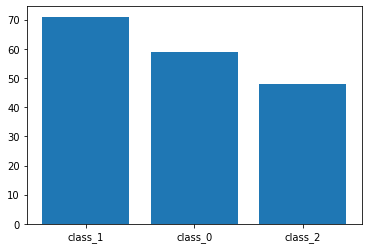

In [3]:
plt.bar(
  wine_type.index,
  wine_type.values,
  width=0.8,
  bottom=None,
  align='center'
)
plt.show()

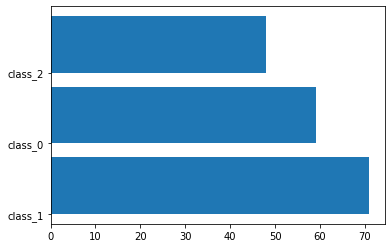

In [4]:
plt.barh(
  wine_type.index,
  wine_type.values,
  height=0.8,
  left=None,
  align='edge'
)
plt.show()

### 2. 히스토그램(histogram)
```
matplotlib.pyplot.hist('변수명', bins=None, range=None, density=False, data=df)
```
- bins : 히스토그램의 구간의 개수 정의
- range : bin의 상한값과 하한값 (x.min(), x.max()) 형태로 선언
- density : True이면 확률밀도함수를 반환

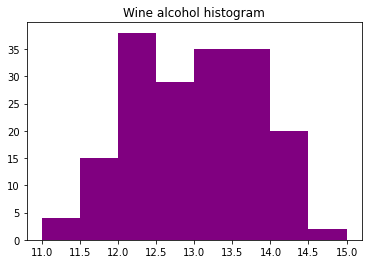

In [5]:
plt.title('Wine alcohol histogram')
plt.hist(
  'alcohol',
  bins=8,
  range=(11, 15),
  color='purple',
  data=wine
)
plt.show()

## 제3절. 상자 그림(box plot)
### 1. 상자 그림의 해석
- 상자
- IQR
- 수염(Whisker)
※ IQR을 이상치를 정제하기 위한 판단 기준으로 사용하기도 한다.

### 2. 상자 그림 그리기

In [6]:
from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(
  iris_load.data,
  columns=iris_load.feature_names
)
iris['class'] = iris_load.target
iris['class'] = iris['class'].map(
  {
    0:'Setosa',
    1:'Versicolour',
    2:'Virginica'
  }
)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


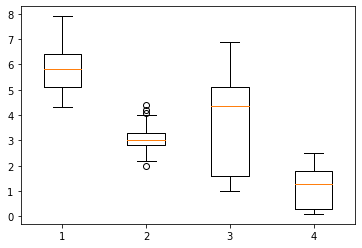

In [7]:
plt.boxplot(iris.drop(columns='class'))
plt.show()

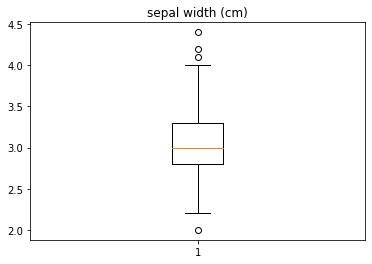

In [8]:
plt.boxplot(iris['sepal width (cm)'], whis=1.5)
plt.title('sepal width (cm)')
plt.show()

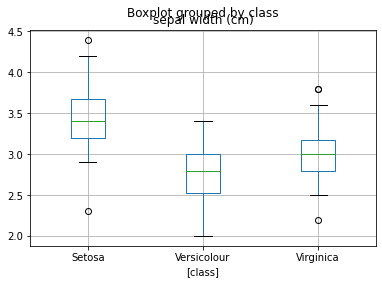

In [9]:
iris[['sepal width (cm)', 'class']].boxplot(by='class')
plt.show()

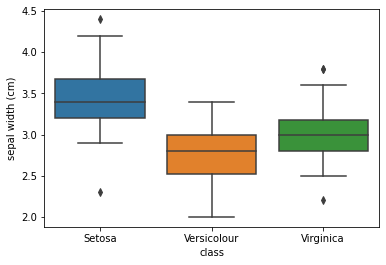

In [10]:
# !pip install seaborn
import seaborn as sns

sns.boxplot(
  x='class',
  y='sepal width (cm)',
  data=iris
)
plt.show()

## 제4절. 산점도(scatter plot)
### 1. Scatter Plot의 해석
**관계의 유형**
- 양의 상관관계 : 기울기 양수
- 음의 상관관계 : 기울기 음수
- 상관관계 없음 : 기울기 0
- 비선형관계 : 곡선
**관계의 강도**
- 약한 상관관계 : 기울기 절대값 작음
- 강한 상관관계 : 기울기 절대값 큼

### 2. Scatter Plot 그리기

In [11]:
iris_load = load_iris()
iris = pd.DataFrame(
  iris_load.data,
  columns=iris_load.feature_names
)
iris['class'] = iris_load.target
iris['class'] = iris['class'].map(
  {
    0:'Setosa',
    1:'Versicolour',
    2:'Virginica'
  }
)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


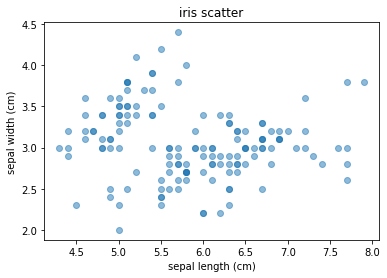

In [12]:
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(
  x=iris['sepal length (cm)'],
  y=iris['sepal width (cm)'],
  alpha=0.5
)
plt.show()

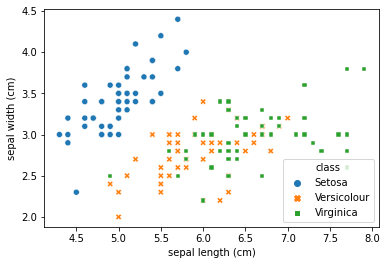

In [13]:
sns.scatterplot(
  x='sepal length (cm)',
  y='sepal width (cm)',
  data=iris,
  hue='class',
  style='class'
)
plt.show()

## 제5절. 선 그래프
### 1. 수평선/수직선 그래프
**수평선은 `hlines()`, 수직선은 `vlines()`**
```
matplotlib.pyplot.hlines(y, xmin, xmax, colors=None, linestyles='solid')
matplotlib.pyplot.vlines(x, ymin, ymax, colors=None, linestyles='solid')
```

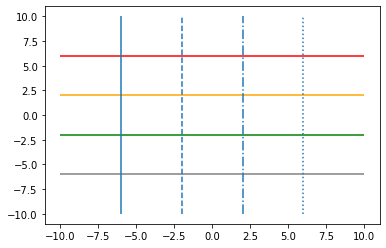

In [14]:
plt.hlines(-6, -10, 10, color='gray')
plt.hlines(-2, -10, 10, color='green')
plt.hlines(2, -10, 10, color='orange')
plt.hlines(6, -10, 10, color='red')
plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')
plt.show()

### 2. 함수식 그래프
```
matplotlib.pyplot.plot(x축, 함수식, data=df, c='color')
```

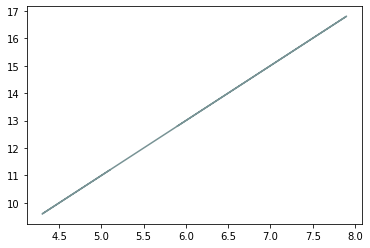

In [15]:
def linear_func(x):
  return 2 * x + 1

iris_val = iris['sepal length (cm)']
plt.plot(
  iris['sepal length (cm)'],
  linear_func(iris_val),
  c='#789395'
)
plt.show()

### 3. 회귀선 그래프
```
numpy.polyfit(x, y, 차수)
```

In [16]:
import numpy as np

iris_x, iris_y = iris['sepal length (cm)'], iris['petal length (cm)']
np.polyfit(iris_x, iris_y, 1)

array([ 1.85843298, -7.10144337])

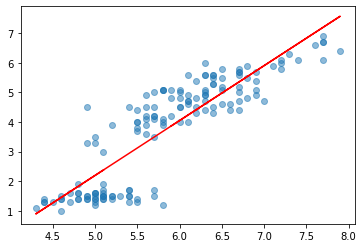

In [17]:
b1, b0 = np.polyfit(iris_x, iris_y, 1)
plt.scatter(
  x=iris_x,
  y=iris_y,
  alpha=0.5
)
plt.plot(
  iris_x,
  b1*iris_x + b0,
  color='red'
)
plt.show()

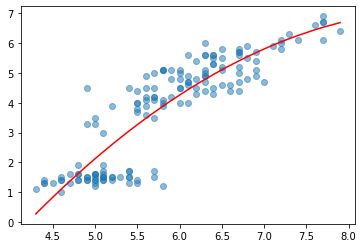

In [18]:
iris_sorted = iris.sort_values(by='sepal length (cm)')
iris_x, iris_y = iris_sorted['sepal length (cm)'], iris_sorted['petal length (cm)']
b2, b1, b0 = np.polyfit(iris_x, iris_y, 2)
plt.scatter(
  x=iris_x,
  y=iris_y,
  alpha=0.5
)
plt.plot(
  iris_x,
  b0 + b1*iris_x + b2*iris_x**2,
  color='red'
)
plt.show()

### 4. 꺾은선 그래프

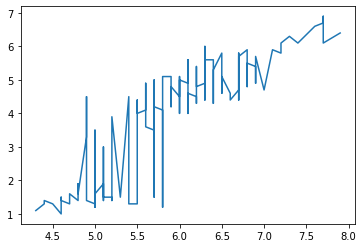

In [19]:
iris_sorted = iris.sort_values(by='sepal length (cm)')
plt.plot(
  'sepal length (cm)',
  'petal length (cm)',
  data=iris_sorted
)
plt.show()

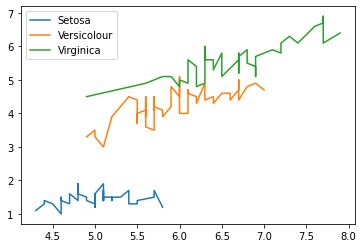

In [20]:
plt.plot(
  'sepal length (cm)',
  'petal length (cm)',
  data=iris_sorted.loc[iris_sorted['class'] == 'Setosa']
)
plt.plot(
  'sepal length (cm)',
  'petal length (cm)',
  data=iris_sorted.loc[iris_sorted['class'] == 'Versicolour']
)
plt.plot(
  'sepal length (cm)',
  'petal length (cm)',
  data=iris_sorted.loc[iris_sorted['class'] == 'Virginica']
)
plt.legend(
  iris_sorted['class'].unique()
)
plt.show()

## 제6절. 상관관계 시각화
### 1. 산점도 행렬
산점도 행렬이란 두 개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프이다.\
변수들 간의 관계를 수량화하여 제공하지는 않지만 실제 데이터의 분포를 한눈에 파악할 수 있고, 2차원 이상의 관계가 존재하는지의 여부도 파악할 수 있다는 장점이 있다.\
pandas.plotting에서는 산점도와 함께 각 변수의 밀도그래프(KDE, Histogram)를 함께 그려 데이터의 분포와 변수들 간의 관계를 함께 살펴볼 수 있도록 하였다.

**산점도 행렬 해석 방법**
1. 대각선의 히스토그램을 통해 이상치를 확인한다.
2. 종속변수와 설명변수들 간의 관계를 시각적으로 판단한다.
3. 종속변수가 수치형인 경우 각 설명변수와의 직선 상관관계를 비교한다.
4. 종속변수가 범주형인 경우 종속변수를 잘 구분하는 변수를 파악한다.
5. 설명변수 간의 직선 함수관게를 파악하여 다중공선성 문제를 진단한다.

```
pandas.plotting.scatter_matrix(data, alpha=0.5, figsize=(8, 8), diagonal='hist')
```
- data : 데이터프레임
- alpha : 투명도(0~1)
- figsize : 그래프 크기(x, y)
- diagonal : 대각선의 밀도 그래프 종류 {hist/kde}

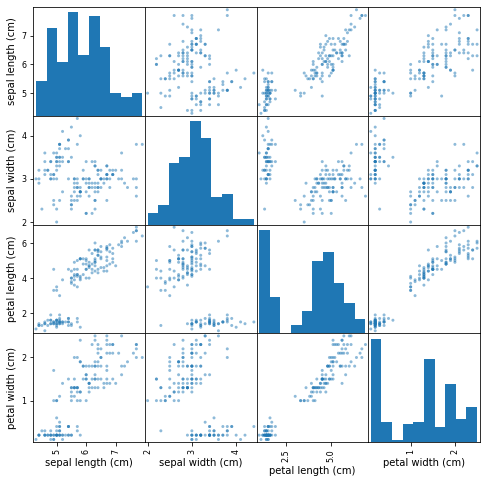

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(
  iris,
  alpha=0.5,
  figsize=(8, 8),
  diagonal='hist'
)
plt.show()

```
seaborn.pairplot(data, diag_kind='auto', hue='target 컬럼명')
```
- data : 데이터프레임
- diag_kind : 대각선 밀도 그래프 종류(auto, hist, kde)
- hue : 색을 구분할 타깃 변수

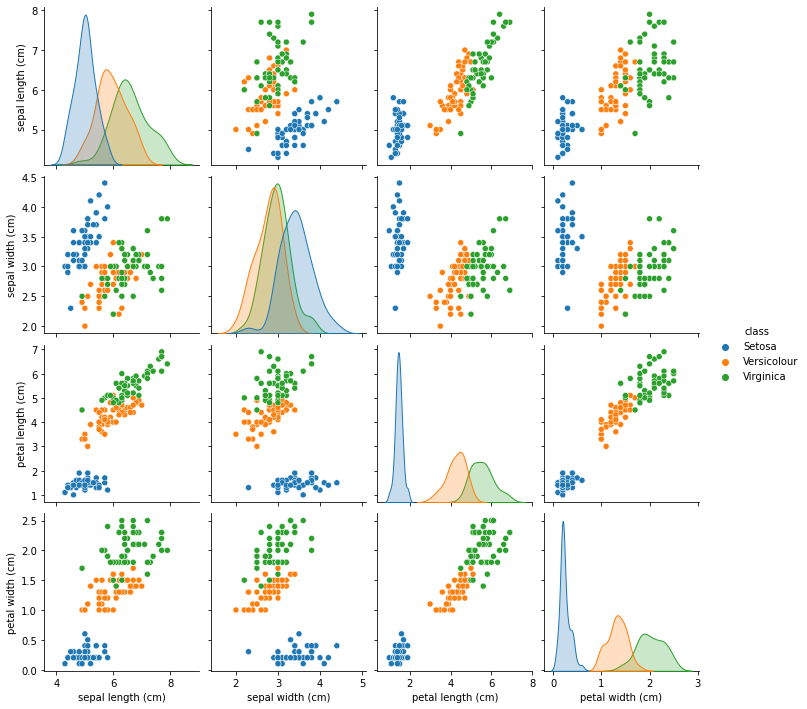

In [22]:
sns.pairplot(
  iris,
  diag_kind='auto',
  hue='class'
)
plt.show()

**KDE 그래프**\
KDE(Kernel Density Estimator, 커널 밀도 추정)는 히스토그램과 함께 Non-parametric 밀도 추정 방법 중 하나이다. bin의 크기와 시작 및 종료 위치에 따라서 그래프가 달라지는 히스토그램의 문제점을 개선한 방법으로, 커널 함수를 사용하여 데이터의 분포를 smooth하게 나타낸 것이다.

### 2. 상관계수 행렬 그래프
상관계수 행렬이란 다수의 변수 간 상관관계를 파악하거나 독립변수 간 다중공선성을 파악하고자 할 때 사용하는 분석 기법이다. 일부 데이터 분석 기법에서는 다중공선성이 높은 독립변수를 제거하거나 정제하기도 하는데, 이때 상관계수 행렬 그래프를 그려 다중공선성이 높은 독립변수 쌍을 직관적으로 파악할 수 있다.

**상관관계 해석하기**
- 절대값 0.8 이상 : 강한 상관관계
- 절대값 0.6 이상 0.8 미만 : 보통 상관관계
- 절대값 0.4 이상 0.6 미만 : 약한 상관관계
- 절대값 0 이상 0.4 미만 : 거의 상관 없음

**상관계수 행렬 시각화하기**
```
data = pandas.DataFrame.corr(method='pearson')
```
- method : 상관분석 방법 {'pearson', 'kendall', 'spearman'}
```
seaborn.heatmap(data, xticklabels=data.columns, yticklabels=data.columns, cmap='RdBu_r', annot=True)
```
- data : 상관행렬을 그릴 데이터의 상관계수 데이터프레임
- xticklabels : x축의 라벨명
- yticklabels : y축의 라벨명
- cmap : 히트맵의 색깔 지정
- annot : True일 경우 상관계수를 텍스트로 표시

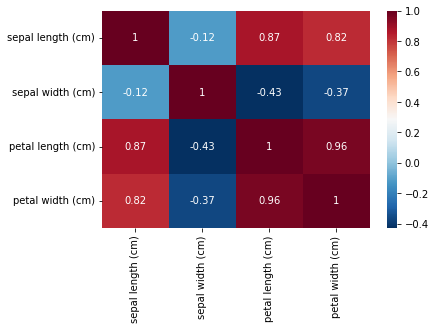

In [23]:
iris_corr = iris.drop(columns='class').corr(method='pearson')
sns.heatmap(
  iris_corr,
  xticklabels=iris_corr.columns,
  yticklabels=iris_corr.columns,
  cmap='RdBu_r',
  annot=True
)
plt.show()

## 제7절. Pandas Profiling
Pandas Profiling은 데이터프레임에 대한 탐색적 분석을 한 줄의 코드로 수행할 수 있는 라이브러리이다. EDA에 소모되는 시간을 획기적으로 줄일 수 있어 시험장에서 유용한 라이브러리이지만, 시험장에서 사용되는 버전을 확인하고 그에 맞는 코드를 준비해 가는 것이 좋다.
### 1. Pandas Profiling 제공 기능
- Overview : 데이터세트의 통계정보 및 컬럼의 체크 사항
- Variables : 컬럼의 통계정보와 Null 정보, 히스토그램 또는 막대그래프 등
- Interactions : 컬럼쌍별 산점도
- Correlations : 상관계수 결정 방식 별 상관행렬 그래프
- Missing values : 값의 개수 및 Null 값의 존재 여부 확인
- Sample : 가장 처음과 마지막 10개의 값
- Duplicate rows : 중복 행
### 2. Pandas Porfiling 수행

In [24]:
# !pip install pandas-profiling[notebook,html]

In [25]:
from pandas_profiling import ProfileReport

ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]